In [46]:
#NOTE: This route has been abandoned in favor of direct python pdf generation
#      It seems much easier to directly define our HTML instead of fighting jupyter and nbconvert and ipyplot (etc) for formatting

#python3 -m jupyter nbconvert /Users/madunlap/Documents/GitHub/dataverse-automated-user-tests/python/pdf_gen.ipynb --to html --output pdf_gen.html --output-dir /Users/madunlap/Desktop --debug --no-input

#Hides warning messages, for example ipyplot's warning about object coercion
import warnings
from IPython.display import display, HTML, Image
warnings.filterwarnings('ignore')

tests_have_passed = True
def pdf_test_runner(test):
    global tests_have_passed
    return_dict = {}

    if tests_have_passed:        
        try:
            return_dict = test()
        except Exception:
            traceback.print_exc()
            tests_have_passed = False
    
    return_dict['success'] = tests_have_passed
    return return_dict

#TODO: We probably need more css to hide the space generated outside the label. Mabye parent parent div?
display(HTML("<style id='test'>label[id^='ipyplot-html-viewer-label'] { display: none; visibility: hidden; }</style>"))


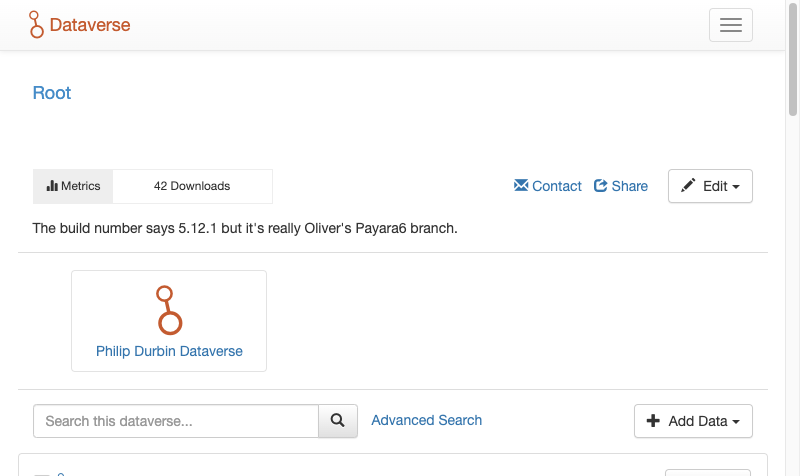
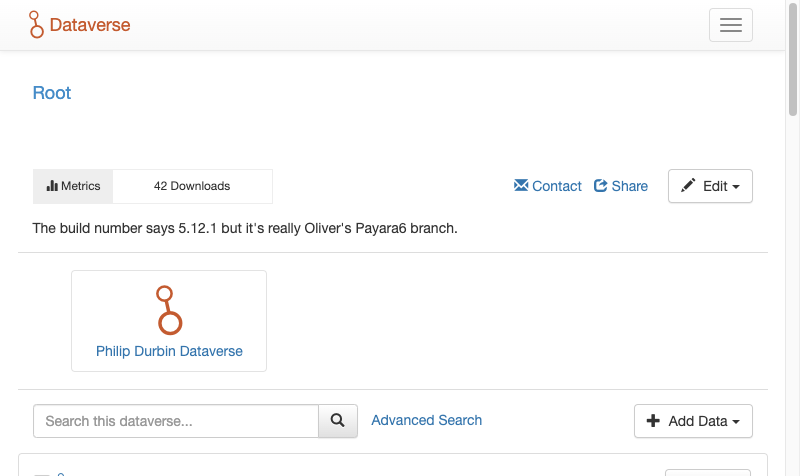
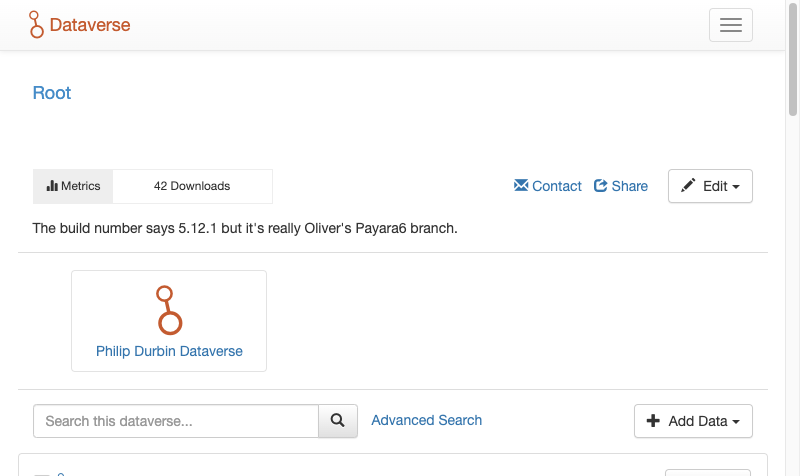


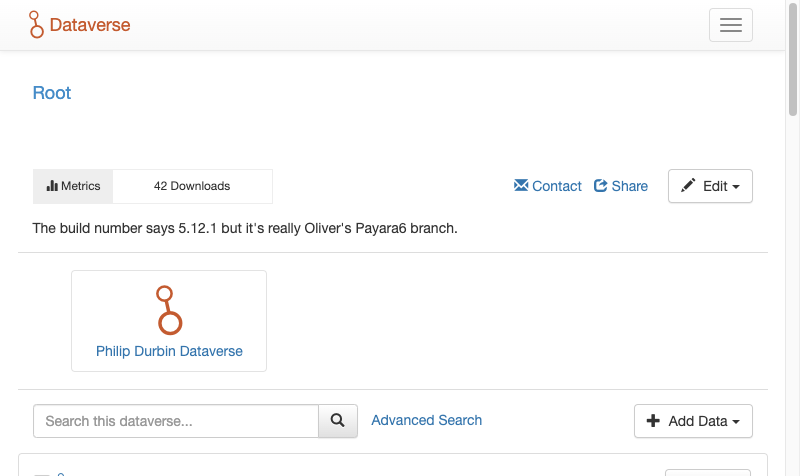
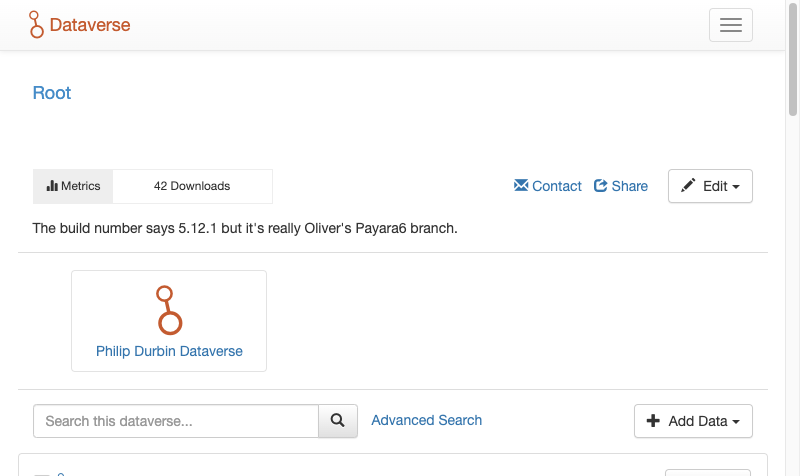
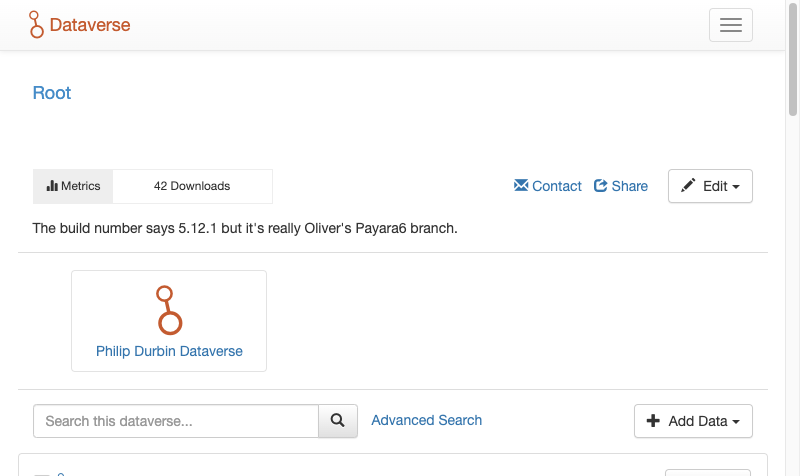

In [47]:
import traceback, importlib, ipyplot
#from IPython.display import Image

from tests.mixins import dataset_testing_mixin as dtm # DataverseTestingMixin, DatasetTestingMixin
from tests.mixins import dataverse_testing_mixin as dvm
#We have to reload our libraries we are developing on each run to pick up changes
importlib.reload(dtm)
importlib.reload(dvm)
from tests import test_ingest_workflow_report as t
importlib.reload(t) 

ingest_test = t.IngestWorkflowReportTestCase(screenshots=True)
ingest_test.setUp()

test01_result = pdf_test_runner(ingest_test.r01alt_mainpath_builtin_auth)
# display(Image(test01_result['screenshot1'])) #Display one image
# display(Image(test01_result['screenshot1']),Image(test01_result['screenshot1'])) #Display 2 images vertical

#TODO: 
#      ... After this, we need to break up the tests and display our iamges with tahe requirement text. I may want to think about grouping the images for easy of use in notebook
#      ... Also test pdf gen
ipyplot.plot_images([test01_result['screenshot1'], test01_result['screenshot1'], test01_result['screenshot1']], max_images=30, img_width=300, labels=['title a','title b','title c'], custom_texts=['subtitle a','subtitle b','subtitle c'])

#print(ingest_test.tearDown())

#print ("Test 01 : " + str(pdf_test_runner(ingest_test.r01alt_mainpath_builtin_auth)))
#pdf_test_runner(ingest_test.get_api_token)
# print ("Test 03: " + str(pdf_test_runner(ingest_test.r03_mainpath_create_sub_dataverse)))
# print ("Test 04: " + str(pdf_test_runner(ingest_test.r04_mainpath_edit_dataverse)))
# print ("Test 05: " + str(pdf_test_runner(ingest_test.r05_mainpath_create_metadata_template)))
# print ("Test 06: " + str(pdf_test_runner(ingest_test.r06_mainpath_edit_metadata_template)))
# print ("Test 09: " + str(pdf_test_runner(ingest_test.r09_mainpath_create_dataset)))
# print ("Test 10: " + str(pdf_test_runner(ingest_test.r10_mainpath_edit_dataset)))